In [46]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
data = pd.read_excel('TurnoverExercise.xlsx')

In [48]:
# Part I
# question 1
start_date = '2000-01-01'
end_date = '2010-12-31'
data_hired = data[(data['hired']>=start_date) & (data['hired']<=end_date)]
avg = data_hired['salary'].mean()
print(len(data_hired), avg)

2681 107817.37635210743


In [49]:
# question 2
age_date = '1978-01-31'
data_e = data[data['jobType'].str.startswith('Engineer')]
data_s_e = data_e[(data_e['location']=='Singapore') & (data_e['birth']<=age_date)]
data_s_e_stay = data_s_e[(data_s_e['voluntaryTermination'] == 0)]
print(len(data_s_e), len(data_s_e_stay))

72 66


In [50]:
# question 3
data_tech = data[data['jobType'].str.startswith('Technician')]
female_tech = data_tech[data_tech['gender']=='F']
male_tech = data_tech[data_tech['gender']=='M']
avg_f = female_tech['salary'].mean()
avg_m = male_tech['salary'].mean()
t_test1 = stats.ttest_ind(female_tech['salary'], male_tech['salary'])
t_test2 = stats.ttest_ind(female_tech['salary'], male_tech['salary'], equal_var=False)
print('male technician: %.3f, female technician: %.3f'%(avg_m, avg_f))
print('t-test with same variance:',t_test1)
print('t-test with unequal variance:',t_test2)

male technician: 83446.115, female technician: 65667.579
t-test with same variance: Ttest_indResult(statistic=-8.0374615216638272, pvalue=3.2287817378472732e-15)
t-test with unequal variance: Ttest_indResult(statistic=-8.8615802132327239, pvalue=1.4977937929275216e-17)


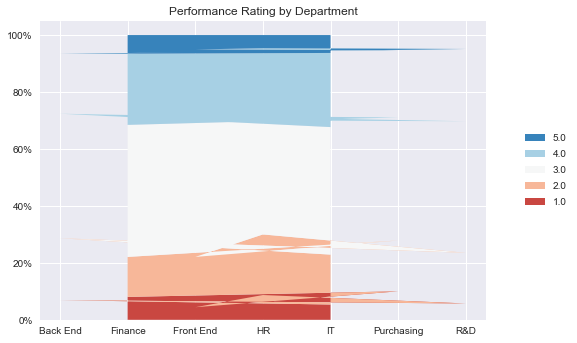

In [54]:
# question 4
rating_counts = data.groupby(['department', 'performance']).agg({'workerID': 'count'})
rating_percentage = rating_counts.groupby(level=0).apply(lambda x: x / float(x.sum())).unstack()

plt.stackplot(data['department'].unique(),
              rating_percentage.T,
              labels=rating_percentage.columns.get_level_values('performance'),
              colors=sns.color_palette('RdBu', 5))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.title('Performance Rating by Department')
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), labelspacing=-2.5, frameon=False)
plt.show()

In [27]:
# question 5
b_data = data[(data['location']=='Boise') & (data['voluntaryTermination']==0)]
bonus_data = b_data[(b_data['bonusAmount'].notnull()) & (b_data['bonusAmount']>0) & (b_data['performance'].notnull())]

In [28]:
X = bonus_data['performance'].values
Y = bonus_data['bonusAmount'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
lr = linear_model.LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

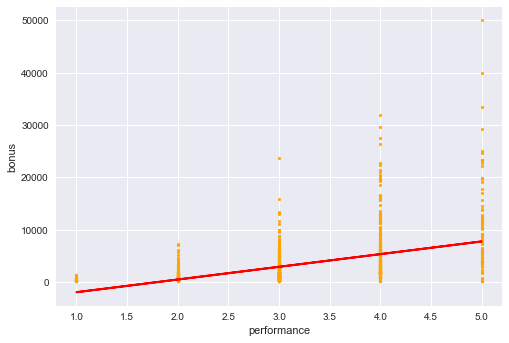

In [29]:
plt.scatter(X,Y,color='orange', s=8)
plt.plot(X, Y_pred, color='red',linewidth=2)
plt.xlabel('performance')
plt.ylabel('bonus')
plt.show()

In [30]:
# metrics
print('R-squared: %.2f'%r2_score(Y, Y_pred))
print("Mean squared error: %.2f"%mean_squared_error(Y, Y_pred))

R-squared: 0.23
Mean squared error: 14974704.24


In [31]:
# part 2
# question 1
today = '2018-5-12'
data['today'] = today 
data['today'] = pd.to_datetime(data['today'])
data['hired'] = pd.to_datetime(data['hired'])
data['tenure'] = (data['today'] - data['hired'])/np.timedelta64(1,'Y')
data.to_csv('hr_data.csv',index=False)
X = data['tenure'].values
Y = data['voluntaryTermination'].values

In [32]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
lr2 = linear_model.LinearRegression()
lr2.fit(X,Y)
Y_pred = lr2.predict(X)
print('R-squared: %.2f'%r2_score(Y, Y_pred))
print("Mean squared error: %.2f"%mean_squared_error(Y, Y_pred))

R-squared: 0.00
Mean squared error: 0.09


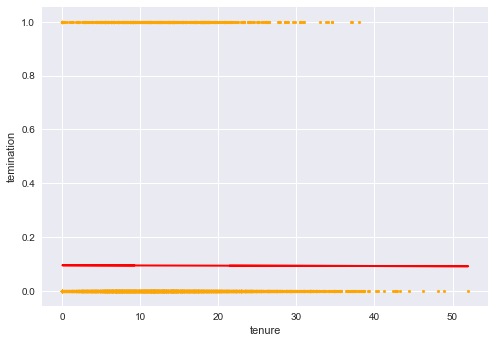

In [33]:
plt.scatter(X,Y,color='orange', s=8)
plt.plot(X, Y_pred, color='red',linewidth=2)
plt.xlabel('tenure')
plt.ylabel('temination')
plt.show()

In [34]:
# question 2 (data preprocessing)
new_data = data.dropna(how='any')
new_data['birth'] = pd.to_datetime(new_data['birth'])
new_data['age'] = (new_data['today'] - new_data['birth'])/np.timedelta64(1,'Y')

/Users/hetty/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hetty/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


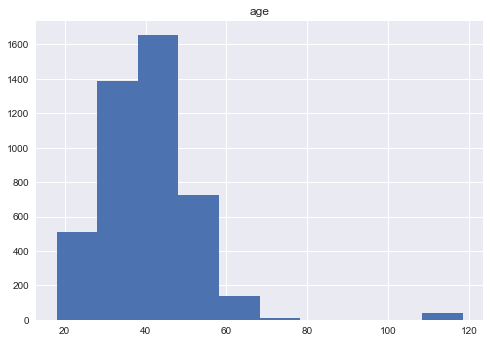

In [35]:
# some values in 'age' attribute is wrong, delete them
plt.hist(new_data['age'])
plt.title('age')
plt.show()
new_data = new_data[new_data['age']<80]

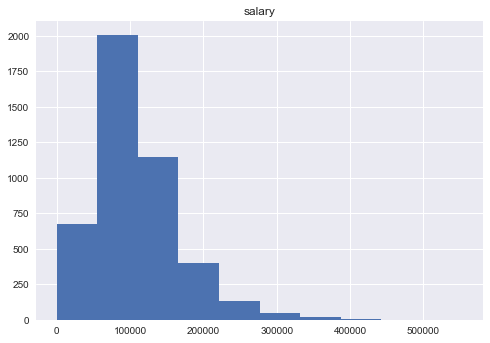

In [36]:
# salary can't be zero
plt.hist(new_data['salary'])
plt.title('salary')
plt.show()
new_data = new_data[new_data['salary'] > 0]

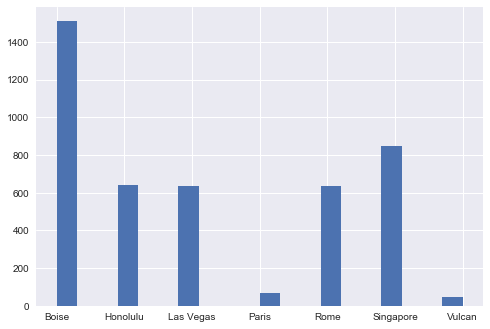

In [40]:
# plot for location
plt.hist(new_data['location'],bins=20)
plt.show()

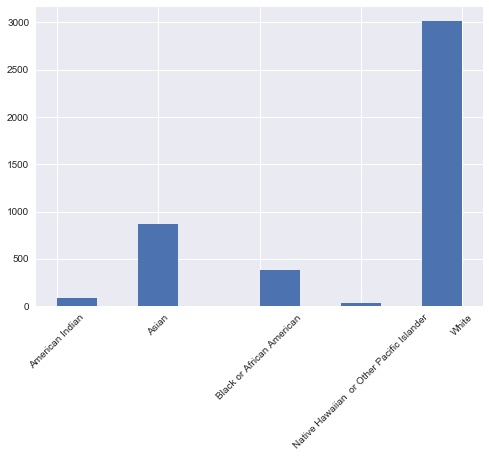

In [43]:
# plot for race
plt.hist(new_data['race'])
plt.xticks(rotation=45)
plt.show()

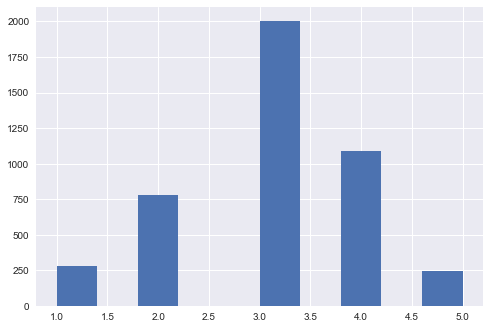

In [45]:
# plot for performance
plt.hist(new_data['performance'])
plt.show()

In [105]:
new_data.to_csv('turnover.csv', index=None)